# Prueba de TFM

## Autor:
Alejandro Belda Fernández

## Importar librerías

In [22]:
from scipy.io import arff
import pandas as pd
from sklearn.metrics import make_scorer
import numpy as np
import csv
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler
import random
from IPython.display import display
from joblib import dump, load
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import resample


In [23]:
shap.initjs() # you need this so the plots can be displayed

In [24]:
semilla=123
np.random.seed(semilla)
random.seed(semilla)

## Preprocesamiento y analisis

In [25]:
csv_file_path = "Data/SEA2_subsampled.csv"

# Leer el archivo ARFF
df = pd.read_csv(csv_file_path)
# Si alguna columna tiene datos binarios o categóricos, decodificar


# Mostrar el DataFrame
print(df.head())

    attrib1   attrib2   attrib3      class  n_chunk
0  7.335064  7.190228  2.292902  b'groupB'        1
1  2.521896  9.904079  8.474748  b'groupB'        1
2  6.195463  8.618297  1.176963  b'groupB'        1
3  3.770053  7.044060  8.024271  b'groupB'        1
4  8.097806  1.167864  7.381770  b'groupB'        1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   attrib1  10000 non-null  float64
 1   attrib2  10000 non-null  float64
 2   attrib3  10000 non-null  float64
 3   class    10000 non-null  object 
 4   n_chunk  10000 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 390.8+ KB


No hay valores nulos

In [27]:
df.describe()

,attrib1,attrib2,attrib3,n_chunk
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.637620,4.610891,4.998980,5.500000
std,2.861832,2.885897,2.878698,2.872425
min,0.000417,0.000973,0.000234,1.000000
25%,2.137752,2.106650,2.506257,3.000000
50%,4.437202,4.395701,5.014246,5.500000
75%,7.055665,7.053776,7.474961,8.000000
max,9.999247,9.999525,9.998298,10.000000


No encuentro valores extraños por lo que no aplicaria normalizacion

In [28]:
df.dtypes

,0
attrib1,float64
attrib2,float64
attrib3,float64
class,object
n_chunk,int64


In [29]:
for i in range(0, df.shape[0], 1000):
    batch = df.iloc[i:i+1000]
    print(batch[:]["class"].value_counts())

    # Aquí puedes hacer lo que necesites con el batch, como entrenar un modelo

class
b'groupB'    800
b'groupA'    200
Name: count, dtype: int64
class
b'groupB'    800
b'groupA'    200
Name: count, dtype: int64
class
b'groupB'    800
b'groupA'    200
Name: count, dtype: int64
class
b'groupB'    800
b'groupA'    200
Name: count, dtype: int64
class
b'groupB'    800
b'groupA'    200
Name: count, dtype: int64
class
b'groupA'    800
b'groupB'    200
Name: count, dtype: int64
class
b'groupA'    800
b'groupB'    200
Name: count, dtype: int64
class
b'groupA'    800
b'groupB'    200
Name: count, dtype: int64
class
b'groupA'    800
b'groupB'    200
Name: count, dtype: int64
class
b'groupA'    800
b'groupB'    200
Name: count, dtype: int64


En principio no habria que aplicar one-ho encoding

<Axes: >

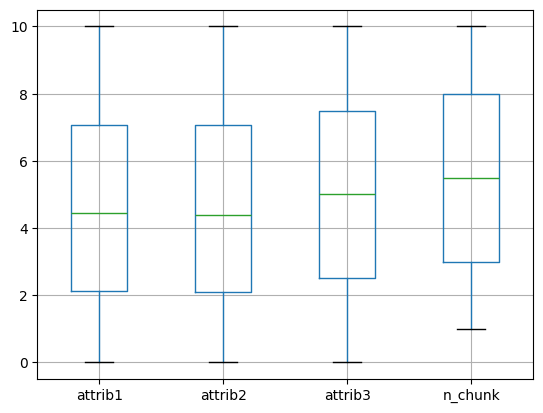

In [30]:
df.boxplot()

In [31]:
df = df.iloc[:, :-1]
print(df.head())

    attrib1   attrib2   attrib3      class
0  7.335064  7.190228  2.292902  b'groupB'
1  2.521896  9.904079  8.474748  b'groupB'
2  6.195463  8.618297  1.176963  b'groupB'
3  3.770053  7.044060  8.024271  b'groupB'
4  8.097806  1.167864  7.381770  b'groupB'


In [32]:
X = df.iloc[:, :-1]  # Selecciona todas las columnas menos la última
y = df.iloc[:, -1]   # Selecciona solo la última columna

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   attrib1  10000 non-null  float64
 1   attrib2  10000 non-null  float64
 2   attrib3  10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [34]:
X.head()

,attrib1,attrib2,attrib3
0,7.335064,7.190228,2.292902
1,2.521896,9.904079,8.474748
2,6.195463,8.618297,1.176963
3,3.770053,7.044060,8.024271
4,8.097806,1.167864,7.381770


In [35]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: class
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [36]:
y.head()

,class
0,b'groupB'
1,b'groupB'
2,b'groupB'
3,b'groupB'
4,b'groupB'


In [37]:
y =y.astype(str).str.strip("b'")  # Elimina el prefijo manualmente
y.head()

,class
0,groupB
1,groupB
2,groupB
3,groupB
4,groupB


In [38]:
y = y.map({'groupA': 0, 'groupB': 1})

In [39]:
y.head()

,class
0,1
1,1
2,1
3,1
4,1


### Primer modelo

In [40]:
def train_in_batches(X, y, modelo, param_grid, batch_size=1000):
    num_instances = X.shape[0]
    results = []
    best_estimators = []
    iteration  = 0
    balanced_accuracy_drift = []
    X_trains = []
    y_trains = []
    X_tests = []
    y_tests = []
    name = modelo
    for start in range(0, num_instances, batch_size):
        end = min(start + batch_size, num_instances)
        X_batch, y_batch = X[start:end], y[start:end]
        print(y_batch.value_counts())

        # Dividir en train y test (80%-20%)
        X_train, X_test, y_train, y_test = train_test_split(X_batch, y_batch, test_size=0.2, random_state=semilla, stratify=y_batch)
        X_trains.append(X_train)
        y_trains.append(y_train)
        X_tests.append(X_test)
        y_tests.append(y_test)

        # Definir el modelo
        if modelo == "LogisticRegression":
            modelo = LogisticRegression(random_state=semilla)
        elif modelo == "Ridge":
            modelo = RidgeClassifier(random_state=semilla)
        elif modelo == "SVC":
            modelo = SVC(random_state=semilla)




        scoring = {
            'balanced_accuracy': make_scorer(balanced_accuracy_score),
            'accuracy': make_scorer(accuracy_score),
            'f1': make_scorer(f1_score),
            'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score)
        }

        # Definir los hiperparámetros a buscar


        # Búsqueda de hiperparámetros con validación cruzada de 3 folds
        grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=3, scoring=scoring, refit="balanced_accuracy", n_jobs=-1, error_score="raise")
        grid_search.fit(X_train, y_train)

        # Evaluar en test
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({
            'batch': start // batch_size + 1,
            'best_params': grid_search.best_params_,
            'test_balanced_accuracy' : balanced_accuracy,
            'test_accuracy': accuracy,
            'test_precision': precision,
            'test_recall': recall,
            'test_f1': f1
        })



        cv_results = grid_search.cv_results_
        print("\n====================================")
        print(f"Batch {start // batch_size + 1}")
        print("\nCross-validation results for the best parameters:")
        print(f"Mean Balanced Accuracy: {cv_results['mean_test_balanced_accuracy'][grid_search.best_index_]:.4f}")
        print(f"Mean Accuracy: {cv_results['mean_test_accuracy'][grid_search.best_index_]:.4f}")
        print(f"Mean F1 Score: {cv_results['mean_test_f1'][grid_search.best_index_]:.4f}")
        print(f"Mean Precision: {cv_results['mean_test_precision'][grid_search.best_index_]:.4f}")
        print(f"Mean Recall: {cv_results['mean_test_recall'][grid_search.best_index_]:.4f}")


        print("------------------------------------")
        print(f"Test Balanced Accuracy: {balanced_accuracy:.4f}")
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Test F1 Score: {f1:.4f}")
        print(f"Test Precision: {precision:.4f}")
        print(f"Test Recall: {recall:.4f}")
        print("------------------------------------")



        best_estimators.append(best_model)
        dump(best_model, f"Models/SEA_{name}_{start // batch_size + 1}.joblib")
        if(iteration > 0 and iteration < 10):
            preds=best_estimators[iteration-1].predict(X_batch)
            balanced_accuracy_drift.append(balanced_accuracy_score(y_batch, preds))
            print(f"Balanced Accuracy Drift: {balanced_accuracy_drift[iteration-1]:.4f}")


        print("====================================\n")
        iteration += 1



    return results,best_estimators, balanced_accuracy_drift, X_trains, y_trains, X_tests, y_tests

In [41]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'max_iter': [100, 200, 300, 500, 1000],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] # Solo para elasticnet
}
#Change this to specify which solver works with which penalty
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 500, 1000], 'class_weight': [None, 'balanced']},
    {'penalty': ['l2'], 'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 500, 1000], 'class_weight': [None, 'balanced']},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 500, 1000], 'class_weight': [None, 'balanced'], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
]


In [42]:
results, best_models, balanced_accuracy_drift, X_trains, y_trains, X_tests, y_tests=train_in_batches(X, y, "LogisticRegression", param_grid)

class
1    800
0    200
Name: count, dtype: int64

Batch 1

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8295
Mean Accuracy: 0.8438
Mean F1 Score: 0.8968
Mean Precision: 0.9467
Mean Recall: 0.8531
------------------------------------
Test Balanced Accuracy: 0.8156
Test Accuracy: 0.8250
Test F1 Score: 0.8837
Test Precision: 0.9433
Test Recall: 0.8313
------------------------------------

class
1    800
0    200
Name: count, dtype: int64

Batch 2

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8299
Mean Accuracy: 0.8400
Mean F1 Score: 0.8942
Mean Precision: 0.9481
Mean Recall: 0.8469
------------------------------------
Test Balanced Accuracy: 0.8000
Test Accuracy: 0.8150
Test F1 Score: 0.8771
Test Precision: 0.9362
Test Recall: 0.8250
------------------------------------
Balanced Accuracy Drift: 0.8163

class
1    800
0    200
Name: count, dtype: int64

Batch 3

Cross-validation results for the best parameters:
Mean Balanced Ac

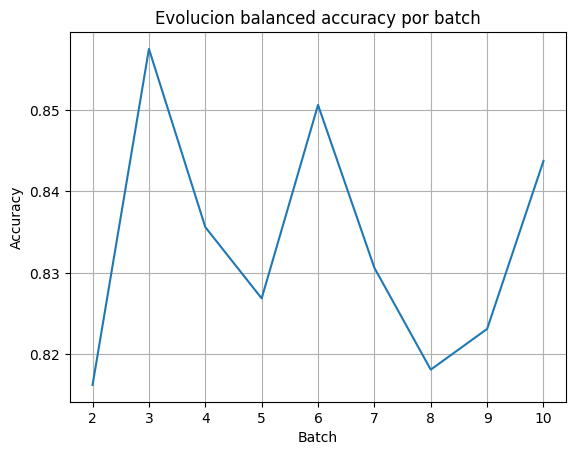

In [43]:
# Crear los valores del eje x sumándole 1 a cada índice
x_values = np.arange(len(balanced_accuracy_drift)) + 2

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar el array con los valores del eje x ajustados
ax.plot(x_values, balanced_accuracy_drift)

# Añadir etiquetas y título
ax.set(xlabel='Batch', ylabel='Accuracy', title='Evolucion balanced accuracy por batch')

# Mostrar la cuadrícula
ax.grid()

# Mostrar el gráfico
plt.show()


### Segundo Modelo

In [44]:
param_grid = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],  # Mayor rango de regularización
    "kernel": ["linear"],  # Se mantiene fijo en "linear"
    "class_weight": [None, "balanced"],  # Manejo de desbalanceo
    "max_iter": [1000, 5000, 10000, 50000],  # Aumentamos el número de iteraciones para asegurar convergencia
    "tol": [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],  # Más opciones para el criterio de convergencia
    "shrinking": [True, False],  # Heurísticas para optimizar entrenamiento
    "random_state": [123],  # Para reproducibilidad
    "cache_size": [100, 200, 500, 1000],  # Aumentamos la caché para mejorar velocidad en datasets grandes
}




In [45]:
results, best_models, balanced_accuracy_drift, X_trains, y_trains, X_tests, y_test=train_in_batches(X, y, "SVC", param_grid)

class
1    800
0    200
Name: count, dtype: int64

Batch 1

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8248
Mean Accuracy: 0.8400
Mean F1 Score: 0.8947
Mean Precision: 0.9447
Mean Recall: 0.8500
------------------------------------
Test Balanced Accuracy: 0.8188
Test Accuracy: 0.8300
Test F1 Score: 0.8874
Test Precision: 0.9437
Test Recall: 0.8375
------------------------------------

class
1    800
0    200
Name: count, dtype: int64

Batch 2

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8322
Mean Accuracy: 0.8400
Mean F1 Score: 0.8942
Mean Precision: 0.9494
Mean Recall: 0.8453
------------------------------------
Test Balanced Accuracy: 0.7969
Test Accuracy: 0.8400
Test F1 Score: 0.8968
Test Precision: 0.9267
Test Recall: 0.8688
------------------------------------
Balanced Accuracy Drift: 0.8213

class
1    800
0    200
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 3

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8656
Mean Accuracy: 0.8675
Mean F1 Score: 0.9128
Mean Precision: 0.9619
Mean Recall: 0.8687
------------------------------------
Test Balanced Accuracy: 0.8562
Test Accuracy: 0.8750
Test F1 Score: 0.9191
Test Precision: 0.9530
Test Recall: 0.8875
------------------------------------
Balanced Accuracy Drift: 0.8662

class
1    800
0    200
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 4

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8346
Mean Accuracy: 0.8437
Mean F1 Score: 0.8966
Mean Precision: 0.9499
Mean Recall: 0.8500
------------------------------------
Test Balanced Accuracy: 0.8875
Test Accuracy: 0.8650
Test F1 Score: 0.9097
Test Precision: 0.9784
Test Recall: 0.8500
------------------------------------
Balanced Accuracy Drift: 0.8469

class
1    800
0    200
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 5

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8741
Mean Accuracy: 0.8850
Mean F1 Score: 0.9254
Mean Precision: 0.9614
Mean Recall: 0.8922
------------------------------------
Test Balanced Accuracy: 0.8250
Test Accuracy: 0.8400
Test F1 Score: 0.8947
Test Precision: 0.9444
Test Recall: 0.8500
------------------------------------
Balanced Accuracy Drift: 0.8431

class
0    800
1    200
Name: count, dtype: int64

Batch 6

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8487
Mean Accuracy: 0.8513
Mean F1 Score: 0.6932
Mean Precision: 0.5890
Mean Recall: 0.8443
------------------------------------
Test Balanced Accuracy: 0.8594
Test Accuracy: 0.8350
Test F1 Score: 0.6857
Test Precision: 0.5538
Test Recall: 0.9000
------------------------------------
Balanced Accuracy Drift: 0.8438

class
0    800
1    200
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 7

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8144
Mean Accuracy: 0.8150
Mean F1 Score: 0.6376
Mean Precision: 0.5245
Mean Recall: 0.8133
------------------------------------
Test Balanced Accuracy: 0.7844
Test Accuracy: 0.8350
Test F1 Score: 0.6292
Test Precision: 0.5714
Test Recall: 0.7000
------------------------------------
Balanced Accuracy Drift: 0.8206

class
0    800
1    200
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 8

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8032
Mean Accuracy: 0.8013
Mean F1 Score: 0.6189
Mean Precision: 0.5022
Mean Recall: 0.8063
------------------------------------
Test Balanced Accuracy: 0.8562
Test Accuracy: 0.8750
Test F1 Score: 0.7253
Test Precision: 0.6471
Test Recall: 0.8250
------------------------------------
Balanced Accuracy Drift: 0.8094

class
0    800
1    200
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 9

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8576
Mean Accuracy: 0.8363
Mean F1 Score: 0.6880
Mean Precision: 0.5625
Mean Recall: 0.8934
------------------------------------
Test Balanced Accuracy: 0.8594
Test Accuracy: 0.8350
Test F1 Score: 0.6857
Test Precision: 0.5538
Test Recall: 0.9000
------------------------------------
Balanced Accuracy Drift: 0.8331

class
0    800
1    200
Name: count, dtype: int64

Batch 10

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8563
Mean Accuracy: 0.8413
Mean F1 Score: 0.6896
Mean Precision: 0.5664
Mean Recall: 0.8813
------------------------------------
Test Balanced Accuracy: 0.8875
Test Accuracy: 0.8650
Test F1 Score: 0.7327
Test Precision: 0.6066
Test Recall: 0.9250
------------------------------------
Balanced Accuracy Drift: 0.8425



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


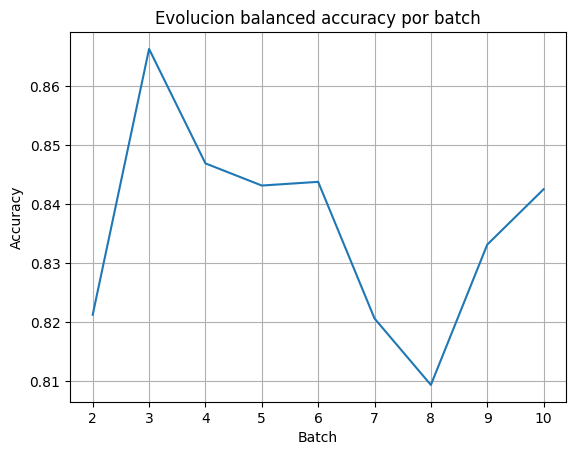

In [46]:
# Crear los valores del eje x sumándole 1 a cada índice
x_values = np.arange(len(balanced_accuracy_drift)) + 2

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar el array con los valores del eje x ajustados
ax.plot(x_values, balanced_accuracy_drift)

# Añadir etiquetas y título
ax.set(xlabel='Batch', ylabel='Accuracy', title='Evolucion balanced accuracy por batch')

# Mostrar la cuadrícula
ax.grid()

# Mostrar el gráfico
plt.show()


### Tercer modelo

In [47]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],  # Más valores de regularización
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Diversidad de solvers
    'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],  # Ajuste más fino de tolerancia
    'class_weight': [None, 'balanced'],  # Manejo de clases desbalanceadas
    'fit_intercept': [True, False],  # Evaluar modelos con y sin intercepto
    'max_iter': [1000, 5000, 10000, 50000],  # Mayor cantidad de iteraciones para garantizar convergencia

}



In [48]:
results, best_models, balanced_accuracy_drift, X_trains, y_trains, X_tests, y_tests=train_in_batches(X, y, "Ridge", param_grid)

class
1    800
0    200
Name: count, dtype: int64

Batch 1

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8131
Mean Accuracy: 0.8138
Mean F1 Score: 0.8748
Mean Precision: 0.9457
Mean Recall: 0.8141
------------------------------------
Test Balanced Accuracy: 0.8094
Test Accuracy: 0.8000
Test F1 Score: 0.8639
Test Precision: 0.9478
Test Recall: 0.7937
------------------------------------

class
1    800
0    200
Name: count, dtype: int64

Batch 2

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8197
Mean Accuracy: 0.8125
Mean F1 Score: 0.8733
Mean Precision: 0.9505
Mean Recall: 0.8078
------------------------------------
Test Balanced Accuracy: 0.7906
Test Accuracy: 0.8000
Test F1 Score: 0.8658
Test Precision: 0.9348
Test Recall: 0.8063
------------------------------------
Balanced Accuracy Drift: 0.8044

class
1    800
0    200
Name: count, dtype: int64

Batch 3

Cross-validation results for the best parameters:
Mean Balanced Ac

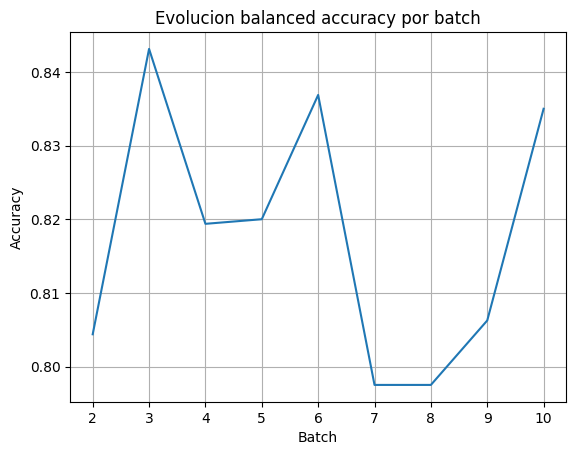

In [49]:
# Crear los valores del eje x sumándole 1 a cada índice
x_values = np.arange(len(balanced_accuracy_drift)) + 2

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar el array con los valores del eje x ajustados
ax.plot(x_values, balanced_accuracy_drift)

# Añadir etiquetas y título
ax.set(xlabel='Batch', ylabel='Accuracy', title='Evolucion balanced accuracy por batch')

# Mostrar la cuadrícula
ax.grid()

# Mostrar el gráfico
plt.show()


In [50]:
import shutil

shutil.make_archive("Models_SEA", "zip", "Models")


'/content/Models_SEA.zip'